# Editing Features

`edit_features()` method on `FeatureLayer` object can be used for editing features. In the example below, we see how to add, update and delete features from a point feature layer

In [1]:
#connect to GIS
from arcgis.gis import GIS
from getpass import getpass
from IPython.display import display

In [2]:
password = getpass()
gis = GIS('https://pycontraptions.maps.arcgis.com','atma_mani',password)

········


<Item title:"fortune_500_styled_wfl" type:Feature Service owner:atma_mani>
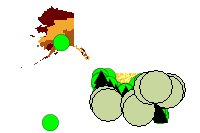

In [3]:
#search for the feature layer named Ports along west coast
search_result = gis.content.search('title:fortune_500_styled_wfl')
search_result[0]

In [4]:
#access the item's feature layers
fortune_500_item = search_result[0]
fortune_500_layers = fortune_500_item.layers
fortune_500_layers

[<FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/3">]

## Query the features
Let us query the features on this layer

In [5]:
cities_flayer = fortune_500_layers[0]
cities_flayer.properties.name

'cities_over1mil'

In [18]:
#query all the features and display it on a map
cities_fset = cities_flayer.query() #an empty query string will return all 
                                        #the features or the first 1000 which ever is smaller

The `df` property of `FeatureSet` class is a powerful way to visualize all the features as a pandas dataframe table.

In [19]:
cities_fset.df

,FEATURE,NAME,POP,geometry.x,geometry.y
OBJECTID,,,,,
1,"Population greater than 999,999 County Seat",Los Angeles,3485398,-1.316297e+07,4.035820e+06
2,"Population greater than 999,999 County Seat",San Diego,1110549,-1.304195e+07,3.857562e+06
3,"Population greater than 999,999 County Seat",New York City,7322564,-8.238278e+06,4.970310e+06
4,"Population greater than 999,999 County Seat",Philadelphia,1585577,-8.367174e+06,4.859018e+06
5,"Population greater than 999,999 County Seat",Dallas,1006877,-1.077579e+07,3.866612e+06
6,"Population greater than 999,999 County Seat",Houston,1630553,-1.061585e+07,3.473191e+06
7,"Population greater than 999,999 County Seat",Chicago,2783726,-9.757182e+06,5.138534e+06
8,"Population greater than 999,999 County Seat",Detroit,1027974,-9.244611e+06,5.210796e+06


## Visualize the features on a map

In [8]:
map1 = gis.map('USA')
map1

In [10]:
map1.add_layer(fortune_500_item)

# Editing features
## Check if the layer can be edited

Check if `edit` capability is found on the `FeatureLayer` object.

In [11]:
cities_flayer.properties.capabilities

'Create,Delete,Query,Update,Editing'

Change the capabilities in the home app. In the next demo we will observe how to change this programmatically

In [10]:
cities_flayer._refresh()
cities_flayer.properties.capabilities

'Create,Delete,Query,Update,Editing'

### Updating features
Change 'New York' to 'New York City'

In [13]:
cities_features = cities_fset.features

# select 'NAME=New York'
ny_feature = [f for f in cities_features if f.attributes['NAME']=='New York'][0]
ny_feature.attributes

{'FEATURE': 'Population greater than 999,999   County Seat',
 'NAME': 'New York',
 'OBJECTID': 3,
 'POP': 7322564}

In [14]:
# lets make a deep copy of ny_feature so we can edit the copy
import copy

In [15]:
ny_edit = copy.deepcopy(ny_feature)
ny_edit.attributes['NAME'] = 'New York City'

In [16]:
display(ny_edit)

{"geometry": {"y": 4970310.197143376, "x": -8238277.756585079}, "attributes": {"OBJECTID": 3, "NAME": "New York City", "FEATURE": "Population greater than 999,999   County Seat", "POP": 7322564}}

Now let us send this feature object to the `edit_features()` method and edit the original feature layer.

`edit_features()` [signature](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#arcgis.features.FeatureLayer.edit_features)

In [17]:
update_result = cities_flayer.edit_features(updates=[ny_edit])
update_result

{'addResults': [],
 'deleteResults': [],
 'updateResults': [{'globalId': None, 'objectId': 3, 'success': True}]}

Check if the updates are reflected in arcgis.com

### Adding features
Call `edit_features()` and pass the new `Feature` object to the `adds` argument

In [22]:
# lets add San Francisco as the new feature
# make use of the ny_edit Feature object and substitute it
print(ny_edit)

{"attributes": {"NAME": "New York City", "POP": 7322564, "OBJECTID": 3, "FEATURE": "Population greater than 999,999   County Seat"}, "geometry": {"y": 4970310.197143376, "x": -8238277.756585079}}


Use Geocoding tools to find the X,Y of SFO.
But to use the geocoding tools we need to know the spatial reference of existing features. We are going to see more of geocoding tomorrow.

In [23]:
# get the SRS from cities FeatureSet object
cities_fset.spatial_reference

{'latestWkid': 3857, 'wkid': 102100}

In [24]:
# now call the geocoding tools
from arcgis import geocoding
results = geocoding.geocode('San Francisco', out_sr = cities_fset.spatial_reference)
results[0]

{'address': 'San Francisco, California, United States',
 'attributes': {'AddBldg': '',
  'AddNum': '',
  'AddNumFrom': '',
  'AddNumTo': '',
  'Addr_type': 'POI',
  'City': '',
  'Country': 'USA',
  'DisplayX': -122.41942,
  'DisplayY': 37.774928,
  'Distance': 0,
  'LangCode': '',
  'Loc_name': 'Gaz.WorldGazetteer.POI1',
  'Match_addr': 'San Francisco, California, United States',
  'Nbrhd': '',
  'Phone': '',
  'PlaceName': 'San Francisco',
  'Place_addr': '',
  'Postal': '',
  'PostalExt': '',
  'Rank': '2.5',
  'Region': 'California',
  'Score': 100,
  'Side': '',
  'StAddr': '',
  'StDir': '',
  'StName': '',
  'StPreDir': '',
  'StPreType': '',
  'StType': '',
  'Subregion': 'San Francisco',
  'Type': 'City',
  'URL': '',
  'X': -122.41942,
  'Xmax': -122.31742,
  'Xmin': -122.52142,
  'Y': 37.774928,
  'Ymax': 37.876928,
  'Ymin': 37.672928},
 'extent': {'xmax': -13616312.909546977,
  'xmin': -13639022.085668804,
  'ymax': 4562054.425915602,
  'ymin': 4533323.9884680845},
 'locat

In [25]:
sfo_location = results[0]['location']
sfo_location

{'x': -13627667.422244564, 'y': 4547679.260407308}

In [33]:
sfo_new_feature = copy.deepcopy(ny_edit)
sfo_new_feature.as_dict['geometry'] = sfo_location
sfo_new_feature.as_dict['attributes']['FEATURE'] = 'created with Python API'
sfo_new_feature.as_dict['attributes']['POP'] = 1234567 #about 1.2 million hypothetically
sfo_new_feature.as_dict['attributes']['NAME'] = 'San Francisco'
#sfo_new_feature.as_dict['attributes']['OBJECTID'] =??  # dont mess with this system field

In [34]:
sfo_new_feature

{"attributes": {"NAME": "San Francisco_sr3", "POP": 1234567, "OBJECTID": 3, "FEATURE": "created with Python API"}, "geometry": {"y": 4547679.260407308, "x": -13627667.422244564}}

In [35]:
add_result = cities_flayer.edit_features(adds = [sfo_new_feature.as_dict])
add_result

{'addResults': [{'globalId': None, 'objectId': 11, 'success': True}],
 'deleteResults': [],
 'updateResults': []}

### Deleting features
Call `edit_features()` method and passing the object id of the feature we want to be remove to the `deletes` parameter. 
**Note**: pass object id as a string

In [38]:
# pass the object id as a string to the delete parameter
delete_result = cities_flayer.edit_features(deletes=str(9))
delete_result

{'addResults': [],
 'deleteResults': [{'globalId': None, 'objectId': 9, 'success': True}],
 'updateResults': []}

## Check results of edit operations
We have successfully added, removed and edited features. Let us query the layer once again and display the resutls as a dataframe and verify them.

In [39]:
cities_fset_edited = cities_flayer.query()
cities_fset_edited.df

,FEATURE,NAME,POP,geometry.x,geometry.y
OBJECTID,,,,,
1,"Population greater than 999,999 County Seat",Los Angeles,3485398,-1.316297e+07,4.035820e+06
2,"Population greater than 999,999 County Seat",San Diego,1110549,-1.304195e+07,3.857562e+06
3,"Population greater than 999,999 County Seat",New York City,7322564,-8.238278e+06,4.970310e+06
4,"Population greater than 999,999 County Seat",Philadelphia,1585577,-8.367174e+06,4.859018e+06
5,"Population greater than 999,999 County Seat",Dallas,1006877,-1.077579e+07,3.866612e+06
6,"Population greater than 999,999 County Seat",Houston,1630553,-1.061585e+07,3.473191e+06
7,"Population greater than 999,999 County Seat",Chicago,2783726,-9.757182e+06,5.138534e+06
8,"Population greater than 999,999 County Seat",Detroit,1027974,-9.244611e+06,5.210796e+06


Thus, we no longer see 'Redlands' which we deleted. We see a new objectid of 23 corresponding to Los Angeles that we added. Also the short_form of San Francisco is corrected to 'SFO'.

The edits we performed on the features are persisted in the feature layer and will reflect in all clients accessing it.